In [1]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
importlib.reload(dal)
import reject_inference as rinf
importlib.reload(rinf)
import helper as h
importlib.reload(h)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import lightgbm as lgbm

import torch
import torch.nn as nn


import torch.distributions as dis

In [24]:
fff = torch.rand(10, 5)
fff

tensor([[0.2462, 0.1617, 0.5125, 0.2656, 0.6664],
        [0.9270, 0.5566, 0.2857, 0.9562, 0.7360],
        [0.9545, 0.9671, 0.3937, 0.6642, 0.9860],
        [0.4783, 0.4509, 0.2638, 0.8603, 0.5531],
        [0.6781, 0.2075, 0.0584, 0.1657, 0.8136],
        [0.4519, 0.9194, 0.6135, 0.8899, 0.6590],
        [0.6344, 0.4785, 0.0996, 0.4528, 0.9925],
        [0.7454, 0.5482, 0.6057, 0.8583, 0.7932],
        [0.0923, 0.5948, 0.9500, 0.6748, 0.6340],
        [0.1628, 0.2803, 0.7660, 0.8544, 0.6249]])

In [29]:
fff.transpose(0, 1)

tensor([[0.2462, 0.9270, 0.9545, 0.4783, 0.6781, 0.4519, 0.6344, 0.7454, 0.0923,
         0.1628],
        [0.1617, 0.5566, 0.9671, 0.4509, 0.2075, 0.9194, 0.4785, 0.5482, 0.5948,
         0.2803],
        [0.5125, 0.2857, 0.3937, 0.2638, 0.0584, 0.6135, 0.0996, 0.6057, 0.9500,
         0.7660],
        [0.2656, 0.9562, 0.6642, 0.8603, 0.1657, 0.8899, 0.4528, 0.8583, 0.6748,
         0.8544],
        [0.6664, 0.7360, 0.9860, 0.5531, 0.8136, 0.6590, 0.9925, 0.7932, 0.6340,
         0.6249]])

In [24]:
nn.Tanh()(torch.rand(10, 1) * 10)

tensor([[1.0000],
        [0.9976],
        [0.9385],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.8249],
        [0.9880],
        [1.0000],
        [0.9374]])

## Test importable Dynamic Acceptance Loop

Itteration: 0) Accepted: 1822 | Denied: 4253 - New train set size: (16822, 68)
Itteration: 1) Accepted: 1822 | Denied: 4253 - New train set size: (18644, 68)
Itteration: 2) Accepted: 1822 | Denied: 4253 - New train set size: (20466, 68)
Itteration: 3) Accepted: 1822 | Denied: 4253 - New train set size: (22288, 68)
Itteration: 4) Accepted: 1822 | Denied: 4253 - New train set size: (24110, 68)
Itteration: 5) Accepted: 1822 | Denied: 4253 - New train set size: (25932, 68)
Itteration: 6) Accepted: 1822 | Denied: 4253 - New train set size: (27754, 68)
Itteration: 7) Accepted: 1822 | Denied: 4253 - New train set size: (29576, 68)
Itteration: 8) Accepted: 1822 | Denied: 4253 - New train set size: (31398, 68)
Itteration: 9) Accepted: 1822 | Denied: 4253 - New train set size: (33220, 68)
Itteration: 10) Accepted: 1822 | Denied: 4253 - New train set size: (35042, 68)
Itteration: 11) Accepted: 1822 | Denied: 4253 - New train set size: (36864, 68)
Itteration: 12) Accepted: 1822 | Denied: 4253 - Ne

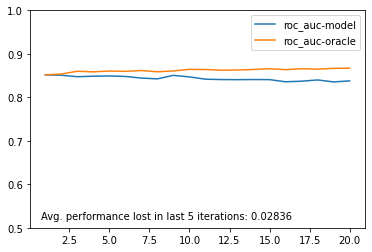

Sampling Bias: 0.02836


In [20]:
n_years = 20

model = lgbm.LGBMClassifier() # DecisionTreeClassifier(min_samples_leaf=40) LogisticRegression(max_iter=400)

sim = dal.Simulate_acceptance_loop("gmsc.csv", model, 0.1, 0.1, n_years, enc_features=False, rej_inf=None)#rinf.EMsemisupervised)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]

last_n_years = 5
bias = h.measure_bias(metrics["oracle"]["holdout"]['roc_auc'], metrics["model"]["holdout"]['roc_auc'], last_n_years)
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.text(0.75, 0.52, f'Avg. performance lost in last {last_n_years} iterations: {round(bias, 5)}')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()


print(f'Sampling Bias: {round(bias, 5)}')

In [21]:
print(h.measure_bias(metrics["oracle"]["holdout"]['roc_auc'], metrics["model"]["holdout"]['roc_auc'], last_n_years))

0.028361741507556347


## Test importable Autoencoder

In [38]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Projects\\Information-Systems-Seminar\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList(
    (0): Linear(in_features=68, out_features=35, bias=True)
    (1): Linear(in_features=35, out_features=10, bias=True)
  )
  (dec): ModuleList(
    (0): Linear(in_features=10, out_features=35, bias=True)
    (1): Linear(in_features=35, out_features=68, bias=True)
  )
)
Epoch 1 of 50, Train Loss: -52570.109
Epoch 2 of 50, Train Loss: 309076736.541
Epoch 3 of 50, Train Loss: 710.646
Epoch 4 of 50, Train Loss: -439.107
Epoch 5 of 50, Train Loss: -602.537
Epoch 6 of 50, Train Loss: 794.129
Epoch 7 of 50, Train Loss: 90.243
Epoch 8 of 50, Train Loss: -120.305
Epoch 9 of 50, Train Loss: 276.708
Epoch 10 of 50, Train Loss: 346.437
Epoch 11 of 50, Train Loss: -745.920
Epoch 12 of 50, Train Loss: -314.034
Epoch 13 of 50, Train Loss: 175.762
Epoch 14 of 50, Train Loss: 608.847
Epoch 15 of 50, Train Loss: -742.935
Epoch 16 of 50, Train Loss: 60.599
Epoch 17 of 50, Train Loss: 425.903
Epoch 18 of 50, Train Loss: 2158.187
Epoch 19 of 50, Train Loss: 1247.638
Epoch

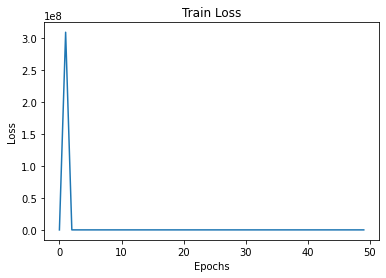

In [39]:
BATCH_SIZE = 200
EPOCHS = 50
LR = 1e-3

dataset = aenc.CreditscoringDataset("gmsc.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True
)

shape = [dataset.x.shape[1], 35, 10, 35, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS, LR)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Itteration: 0) Accepted: 1822 | Denied: 4253 - New train set size: (16822, 10)
Itteration: 1) Accepted: 1822 | Denied: 4253 - New train set size: (18644, 10)
Itteration: 2) Accepted: 1821 | Denied: 4254 - New train set size: (20465, 10)
Itteration: 3) Accepted: 1822 | Denied: 4253 - New train set size: (22287, 10)
Itteration: 4) Accepted: 1822 | Denied: 4253 - New train set size: (24109, 10)
Itteration: 5) Accepted: 1822 | Denied: 4253 - New train set size: (25931, 10)
Itteration: 6) Accepted: 1822 | Denied: 4253 - New train set size: (27753, 10)
Itteration: 7) Accepted: 1822 | Denied: 4253 - New train set size: (29575, 10)
Itteration: 8) Accepted: 1822 | Denied: 4253 - New train set size: (31397, 10)
Itteration: 9) Accepted: 1822 | Denied: 4253 - New train set size: (33219, 10)
Itteration: 10) Accepted: 1822 | Denied: 4253 - New train set size: (35041, 10)
Itteration: 11) Accepted: 1822 | Denied: 4253 - New train set size: (36863, 10)
Itteration: 12) Accepted: 1822 | Denied: 4253 - Ne

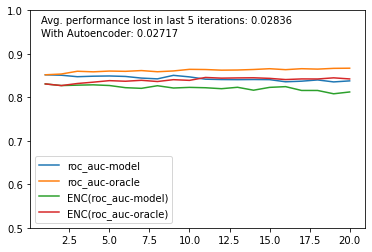

In [40]:
n_years = 20

sim = dal.Simulate_acceptance_loop("gmsc.csv", model, 0.1, 0.1, n_years, enc_features=True, encoder=net)#, rej_inf=rinf.EMsemisupervised)
results_generator = sim.run()

metrics2 = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics2 = iteration[3]

last_n_years = 5
bias2 = h.measure_bias(metrics2["oracle"]["holdout"]['roc_auc'], metrics2["model"]["holdout"]['roc_auc'], last_n_years)
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
plt.plot(x, metrics2["model"]["holdout"]['roc_auc'], label = 'ENC(roc_auc-model)')
plt.plot(x, metrics2["oracle"]["holdout"]['roc_auc'], label = 'ENC(roc_auc-oracle)')
plt.text(0.75, 0.97, f'Avg. performance lost in last {last_n_years} iterations: {round(bias, 5)}')
plt.text(0.75, 0.94, f'With Autoencoder: {round(bias2, 5)}')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()